# Examen de Certificación Intento I

En el presente notebook se limpiará, explorará, implementará y evaluará modelos de clasificación aplicados a un dataset real.

| Variable               | Descripción                                         |
|------------------------|-----------------------------------------------------|
| **fixed acidity**      | Acidez fija en g/dm³                                |
| **volatile acidity**   | Acidez volátil en g/dm³                             |
| **citric acid**        | Ácido cítrico en g/dm³                              |
| **residual sugar**     | Azúcar residual en g/dm³                            |
| **chlorides**          | Cloruros en g/dm³                                   |
| **free sulfur dioxide**| Dióxido de azufre libre en mg/dm³                   |
| **total sulfur dioxide** | Dióxido de azufre total en mg/dm³                |
| **density**            | Densidad en g/cm³                                   |
| **pH**                 | Nivel de pH                                         |
| **sulphates**          | Sulfatos en g/dm³                                   |
| **alcohol**            | Porcentaje de alcohol en % vol.                     |
| **quality**            | Calidad del vino (variable objetivo, escala de 0 a 10) |


In [356]:
import pandas as pd

#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#  Contexto y Descripción del Dataset

In [357]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [358]:
path_red = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen/dataset/winequality-red.csv"
path_white = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen/dataset/winequality-white.csv"

In [359]:
df_red = pd.read_csv(path_red, sep=';')
df_white = pd.read_csv(path_white, sep=';')

## Limpieza de Datos
Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.  

In [360]:
df_white.head()
df_white.info() #a primera vista no se observan nulos
df_white.describe().T  #revisar si existen outliers

df_red.head()
df_red.info() #a primera vista no se observan nulos
df_red.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



Dado que ambos dataset poseen las misma columnas, una alternatova hubiese sido de añadirles una columna con el tipo (variable nominal binaria categorica) red o white y luego unirlos.  

Sin embargo la data (filas) del data set de white wine es casi tres veces el tamaño del de red wine por lo que esto podría afectar en el entrenamiento de los modelos. Por este motivo, trabajaré los data set por separado tanto para el EDA como para el entrenamiento de modelos.


In [361]:
#Aunque en la fuente del data set se indica que no hay nulos, haré una revisión
df_red.isnull().sum()# ver si hay nulos -> no hay nulos
df_red.duplicated().sum() # validar si hay duplicados -->240 valores duplicados
#240/1599 corresponde al 15% de los datos.  Seguiré revisando
#Debido a que un vino con las mismas caracteristicas será de la misma calidad (queality), he decidido eliminar los datos duplicados para efectos del entrenamiento de modelos predictivos,
#en este caso data duplicada puede cargar o sobre ajustar el modelo hacia un quality en particular.

df_red = df_red.drop_duplicates()
df_red.duplicated().sum() #confirmar que se hayan eliminado los duplicados
df_red.shape[0] #persisten 1359 filas

1359

In [362]:
df_red["quality"].value_counts()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


## 2. Exploración de Datos:
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

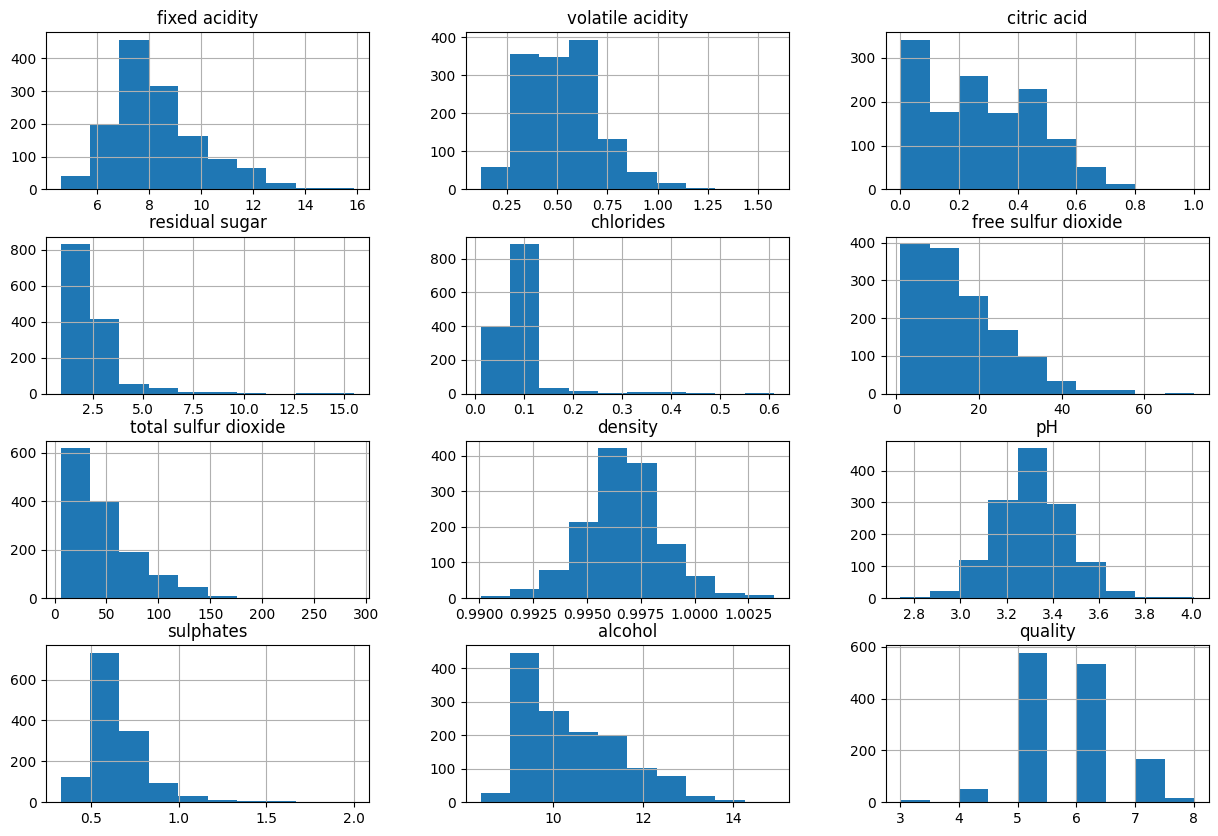

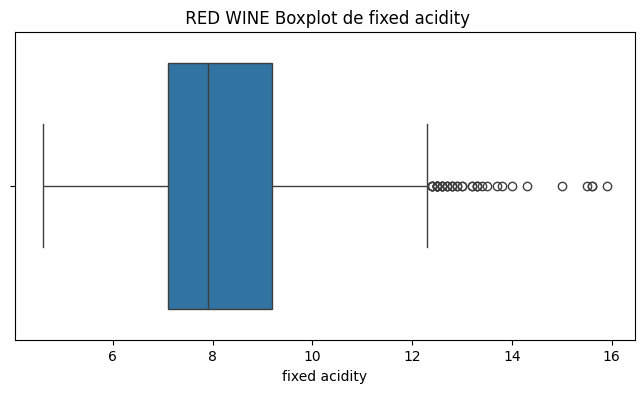

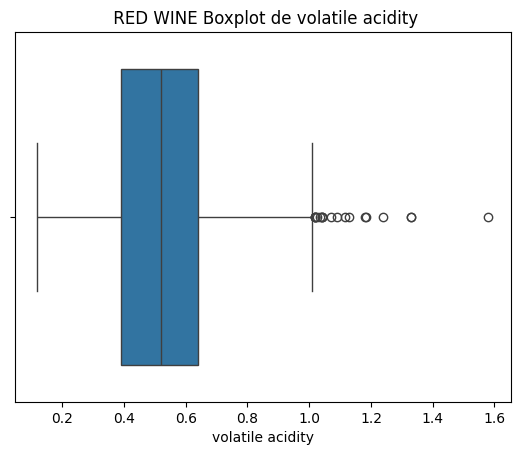

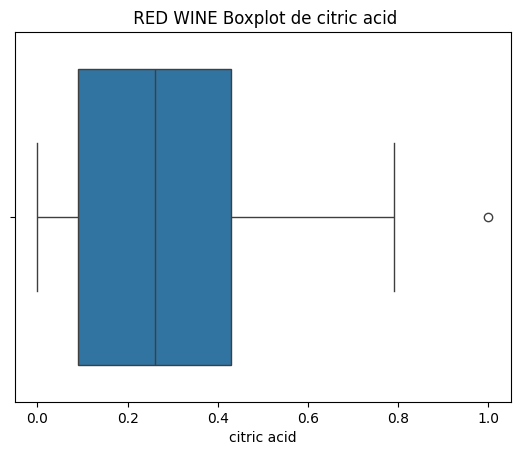

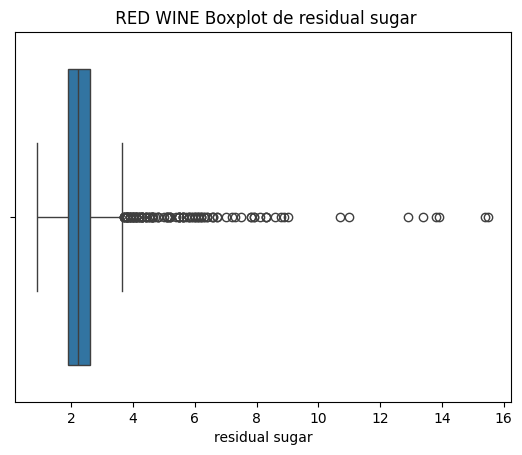

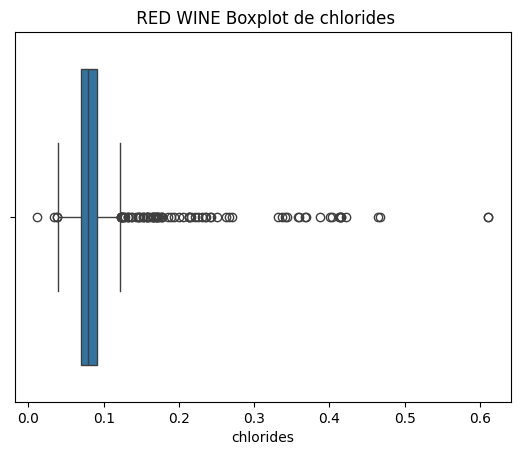

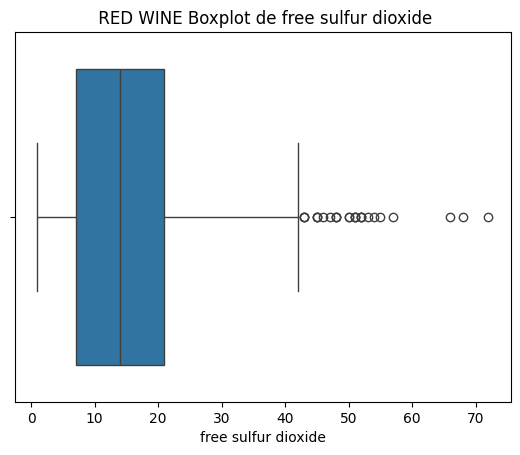

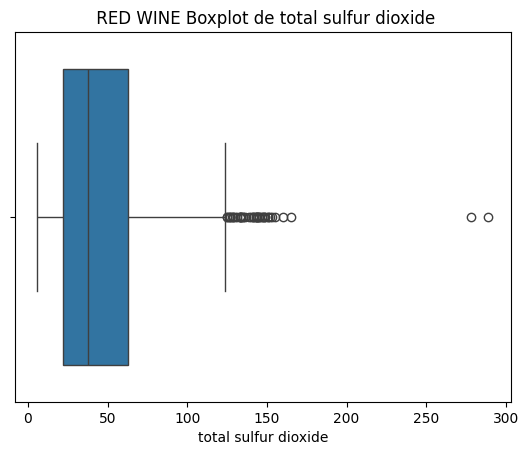

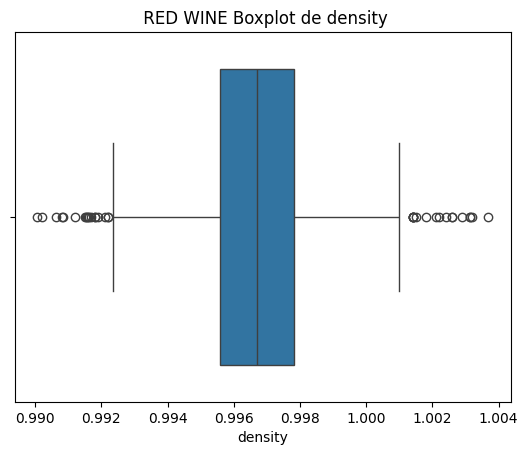

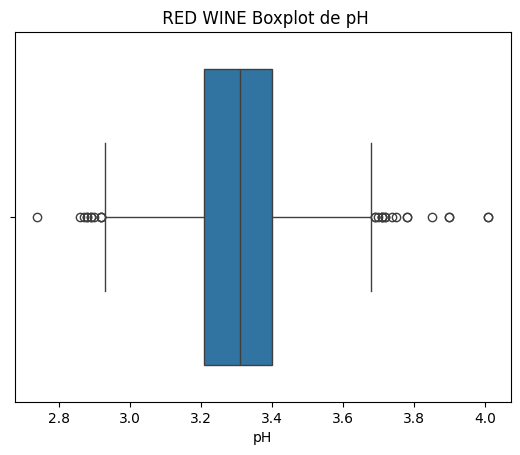

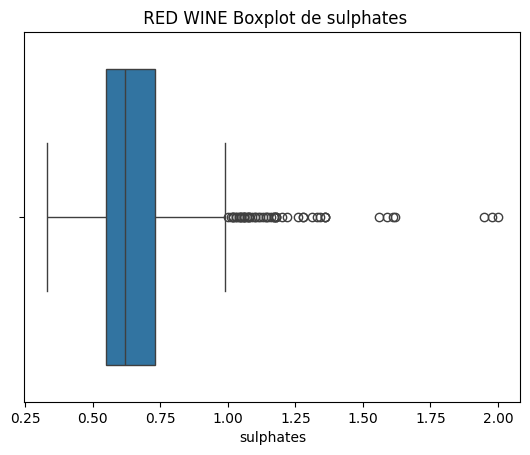

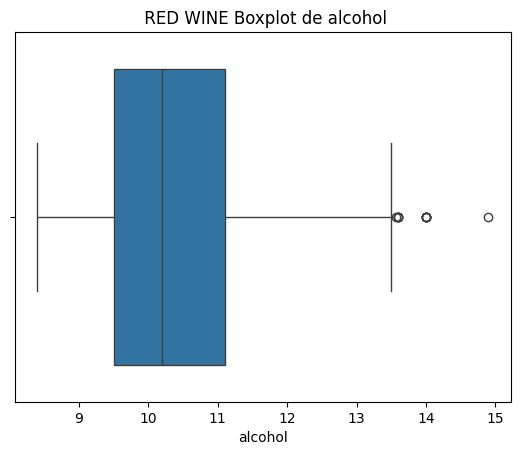

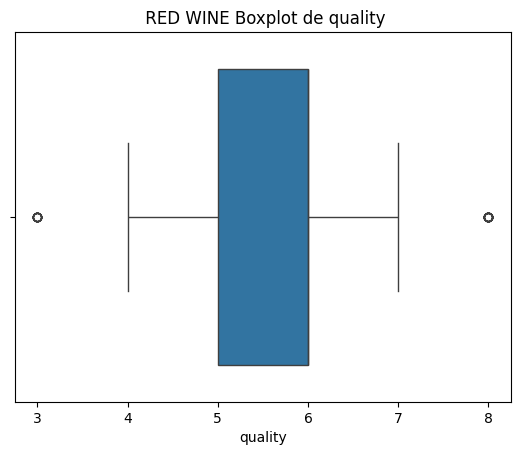

In [363]:
#observar comportamiento de las variables
df_red.hist(bins=10, figsize=(15,10))
plt.show()

# Boxplots para ver outliers
plt.figure(figsize=(8, 4))
for col in df_red.columns: #recorro columnas del dataframe

    sns.boxplot(x=df_red[col])
    plt.title(f' RED WINE Boxplot de {col}')
    plt.show()

Tratamiento se outliers  
Según cierta fuente _"The maximum level of total and free sulfur dioxide is fixed in the European Community by the International Organisation of Vine and Wine (OIV) and it depends on the type of wine (up to 150 mg L−1 for red wines and up to 400 mg L−1 for sweet white wines)."_ (Food Chemistry
Volume 228, 1 August 2017, Pages 518-525)

Considerando que el valor maximo para total sulfur dioxide es de 150 para vinos rojos, tenemos dos valores que sobrepasan por mucho ese limite, se acercan a los 300. Los eliminaré de la muestra:



In [364]:
#df_red.info()
df_red[df_red["total sulfur dioxide"]> 200]
df_red = df_red[df_red["total sulfur dioxide"] <= 200]
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1357.0,8.311201,1.738199,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1357.0,0.529816,0.182954,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1357.0,0.271732,0.195052,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1357.0,2.514886,1.334976,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1357.0,0.088180,0.049392,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1357.0,15.861459,10.421941,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1357.0,46.477155,32.171729,6.00000,22.0000,38.0000,63.00000,165.00000
density,1357.0,0.996714,0.001865,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1357.0,3.310228,0.154722,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1357.0,0.658924,0.170697,0.33000,0.5500,0.6200,0.73000,2.00000


Otro outlier notorio lo podemos ver en el acido critrico. Sin embargo, según CDR WineLab® el máximo de ácido cítrico permitido en el vino, según la normativa europea, es de 1 gramo por litro (1 g/L). Por lo que este outliers podría ser un dato real y no corresponder a un error.

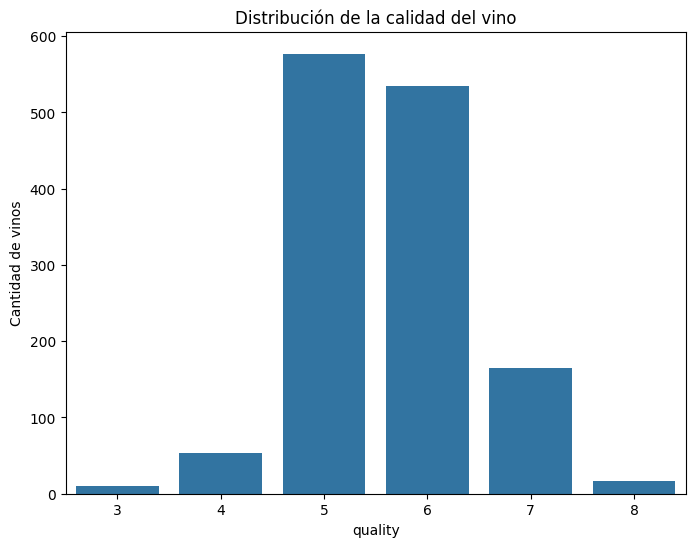

In [365]:
#explorar comportamiento de la variable objetivo o target: quality en la muestra
plt.figure(figsize=(8, 6))

sns.countplot(data=df_red,x='quality')
plt.title('Distribución de la calidad del vino')
plt.xlabel('quality')
plt.ylabel('Cantidad de vinos')
plt.show()

Se observa que la mayoría de los vinos de la muestra poseen calidad 5, luego le siguen los de calidad 6 y 7.  No se observan vinos tintos de calidad 0, 1, 2, 9 y 10.

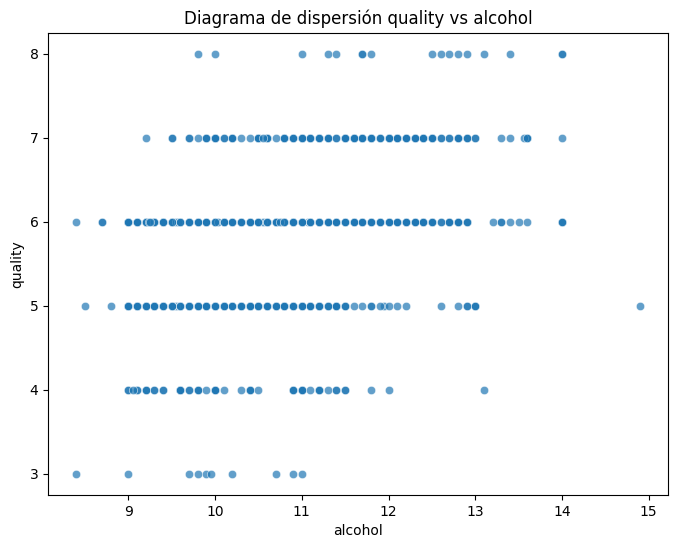

In [366]:
#exploración de los datos: visualización multivariada
plt.figure(figsize=(8, 6))

sns.scatterplot(   data=df_red,x='alcohol',y='quality',alpha=0.7)

plt.title('Diagrama de dispersión quality vs alcohol')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

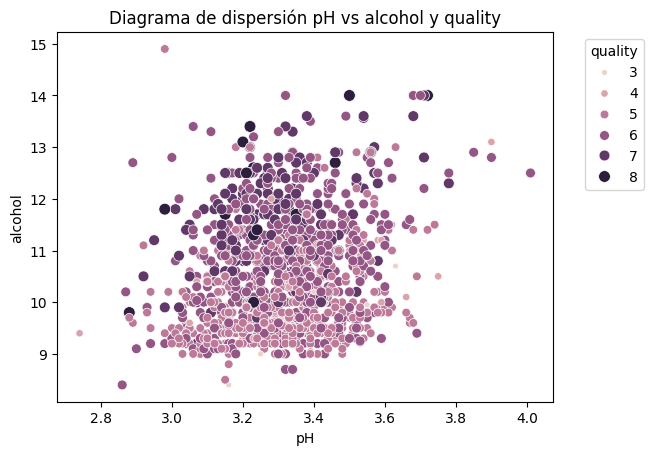

In [367]:
#exploración de los datos: visualización multivariada
sns.scatterplot(data=df_red, x='pH',y='alcohol',size='quality',hue='quality')

plt.title('Diagrama de dispersión pH vs alcohol y quality')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.legend(title='quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De este diagrama de dispersión podemos concluir que los vinos de menor calidad de concentran entre los pH 3 y 3,6 y poseen bajos grados alcoholicos

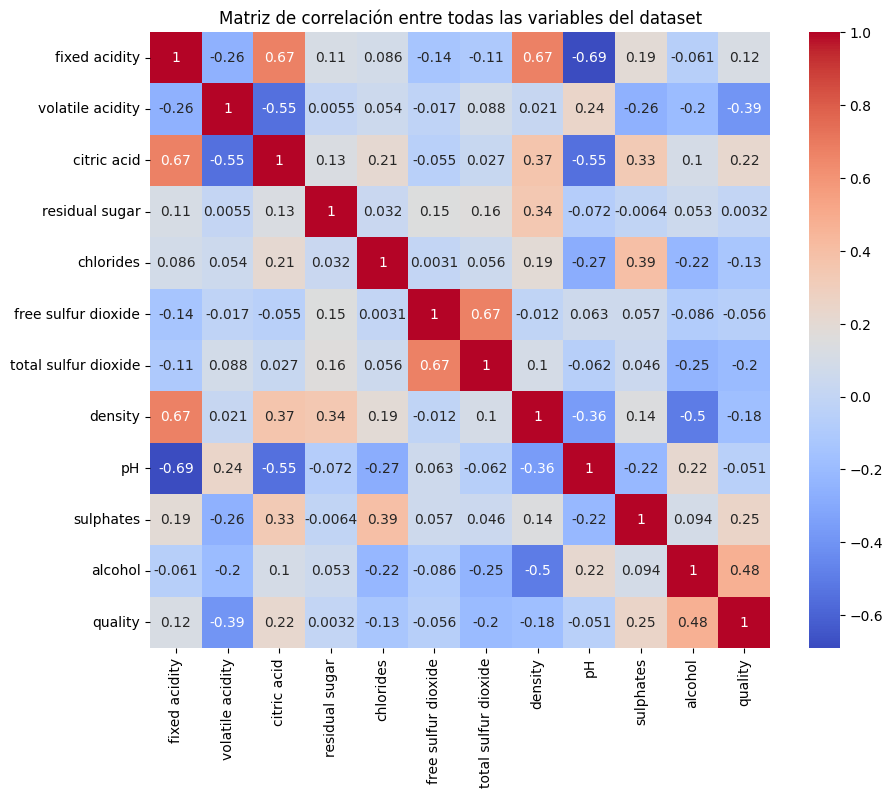

In [368]:
#Explorar relación entre las variables con mapas de calor
corr = df_red.corr() #matriz de correlacion

# Definir tamaño de la figura
plt.figure(figsize=(10, 8))

# Dibujar el heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset")
plt.show()

Del siguiente mapa de calor o matriz de correlación podemos extraer que existe una alta relacion entre la variable pH y fixed acidity, igualmente pH está relacionada con la cantidad de acido citrico en la muestra. Tiene sentido. No se observan relaciones muy importantes entre las otras variables. Pero si sería importante destacar que existe una relación entre los grados alcoholicos y la calidad del vino.

In [369]:
#Luego de la limpiea, reviso nuevamente estadisticas descriptivas
df_red.describe().T
#calcular la moda de cada calumna
columnas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality']

for col in columnas:
    print(col ,":",df_red[col].mode().iloc[0])

fixed acidity : 7.2
volatile acidity : 0.5
citric acid : 0.0
residual sugar : 2.0
chlorides : 0.08
free sulfur dioxide : 6.0
total sulfur dioxide : 28.0
density : 0.9968
pH : 3.3
sulphates : 0.54
alcohol : 9.5
quality : 5


Ya tenemos la data limpia y explorada para Red Wine.   
A continuación, se procede a aplicar limpieza, verificación, corrección al data frame de vinos blancos

In [370]:
df_white.head()
df_white.info() #a primera vista no se observan nulos
df_white.describe().T  #revisar si existen outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Se observan outliers en las columnas:  citric acid (>1) y total sulfur dioxide (>400)

Según el sitio Food Chemistry _"The maximum level of total and free sulfur dioxide is fixed in the European Community by the International Organisation of Vine and Wine (OIV) and it depends on the type of wine (up to 150 mg L−1 for red wines and up to 400 mg L−1 for sweet white wines)."_ (Food Chemistry
Volume 228, 1 August 2017, Pages 518-525)

Según CDR WineLab® el máximo de ácido cítrico permitido en el vino, según la normativa europea, es de 1 gramo por litro (1 g/L).

Más adelante serán tratados estos outliers, al momento de ver los boxplot.

In [371]:
df_white.isnull().sum()# ver si hay nulos -> no hay nulos
#df_white.duplicated().sum() # validar si hay duplicados --> 937 duplicados-> 19% de los datos
#df_white.info()
#Por las razones explicadas más arriba, se eliminan los duplicados de la muestra.
df_white = df_white.drop_duplicates()
df_white.duplicated().sum()

np.int64(0)

In [372]:
df_red["quality"].value_counts()

,count
quality,
5,577
6,535
7,165
4,53
8,17
3,10


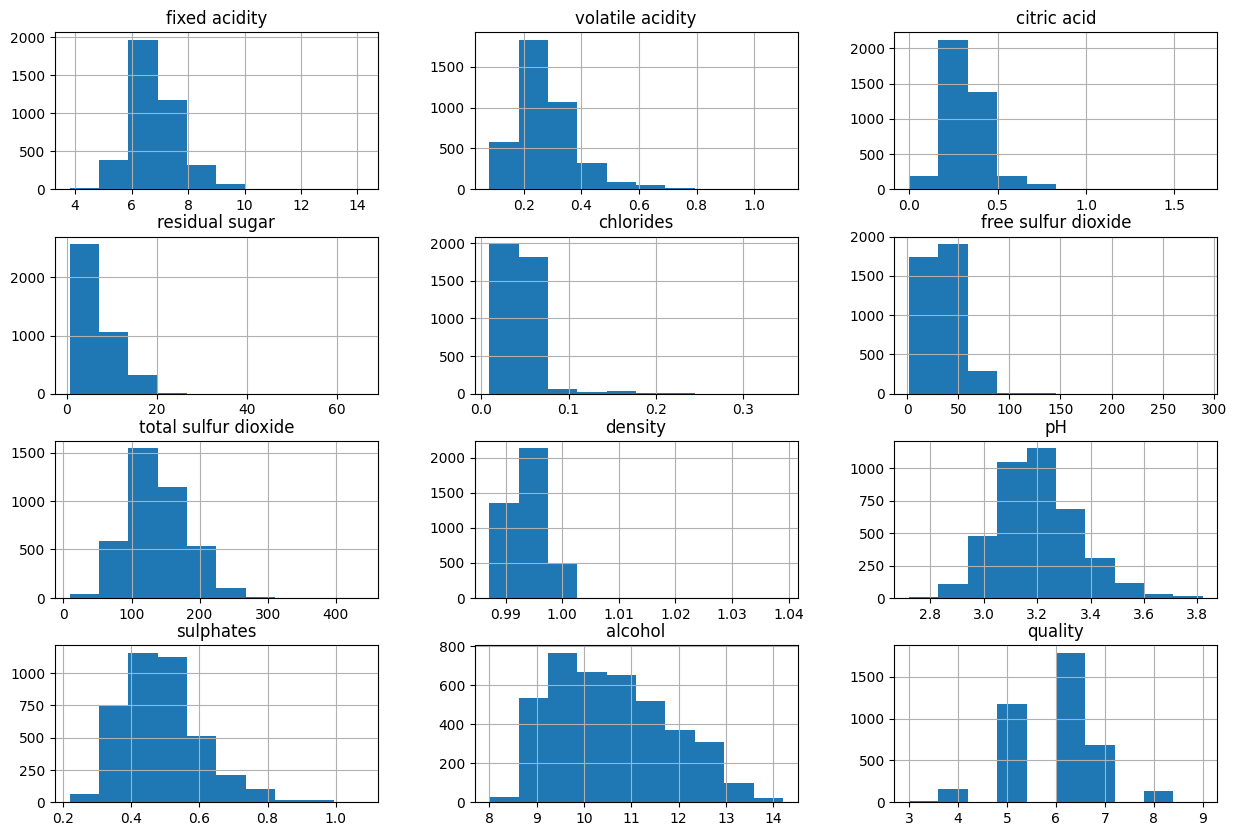

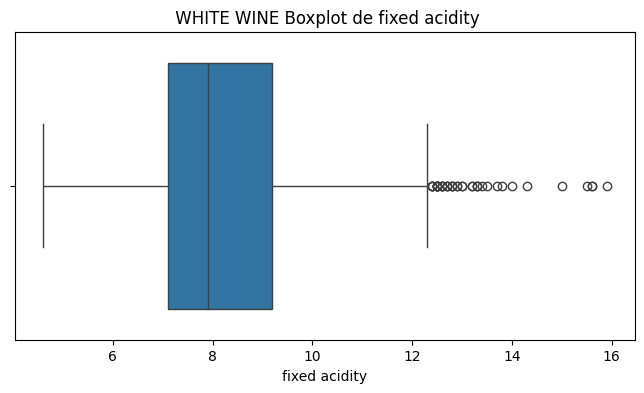

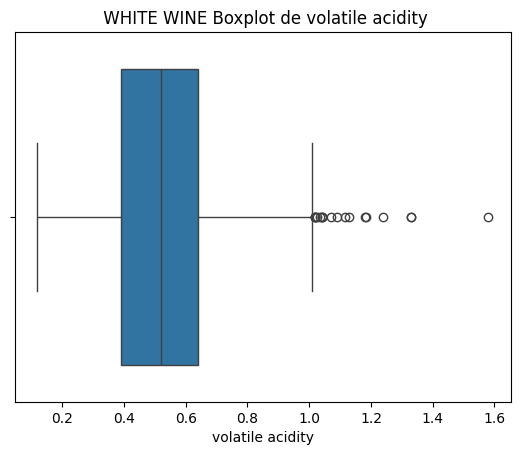

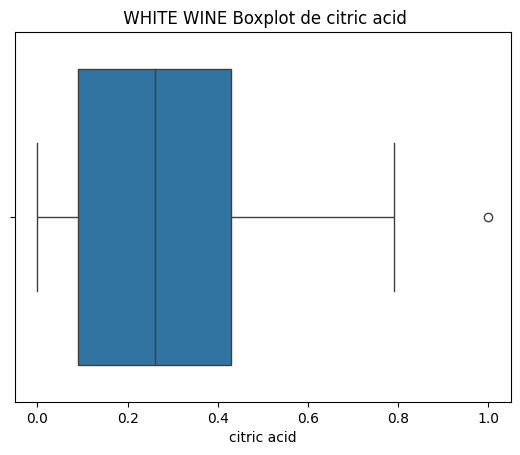

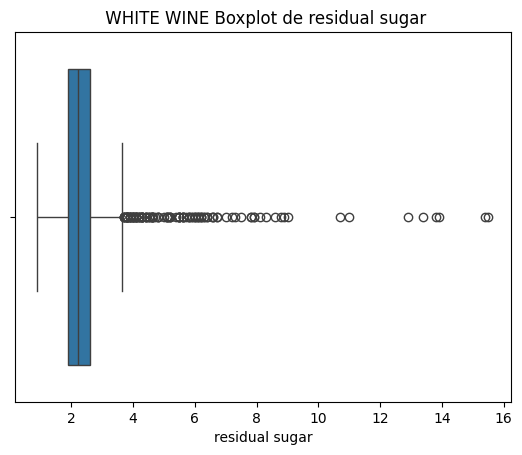

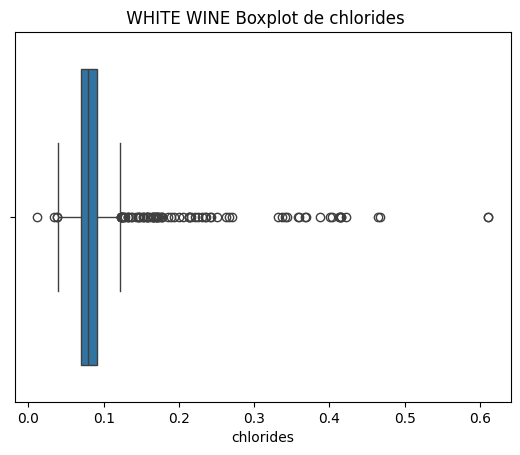

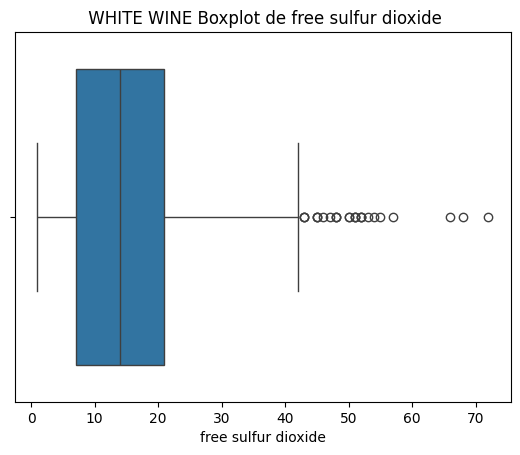

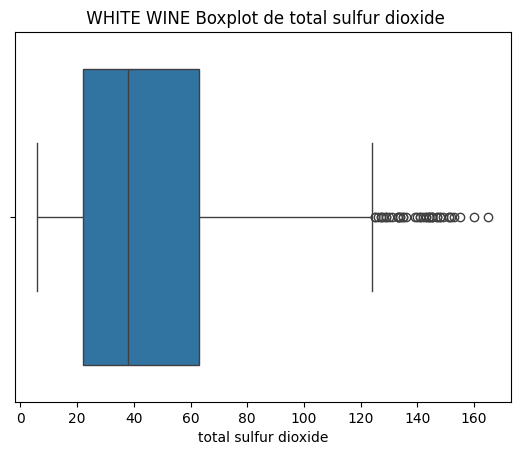

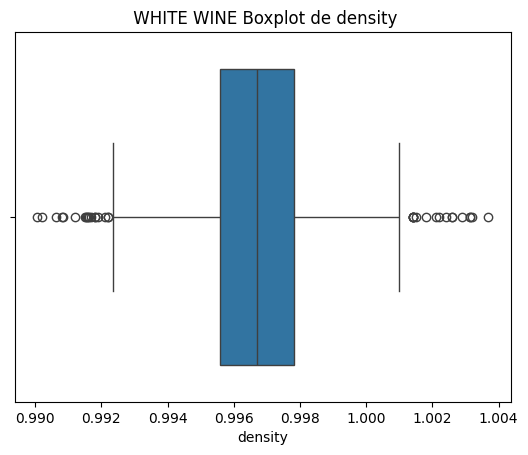

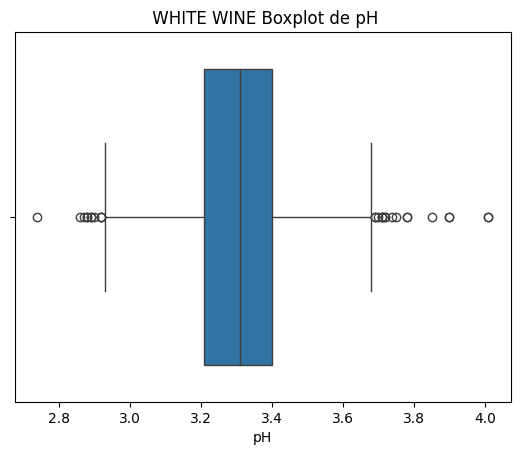

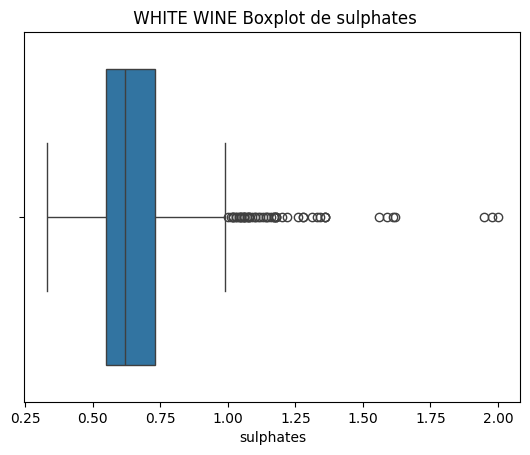

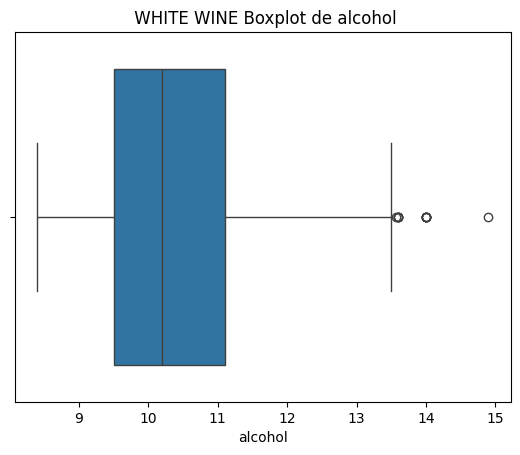

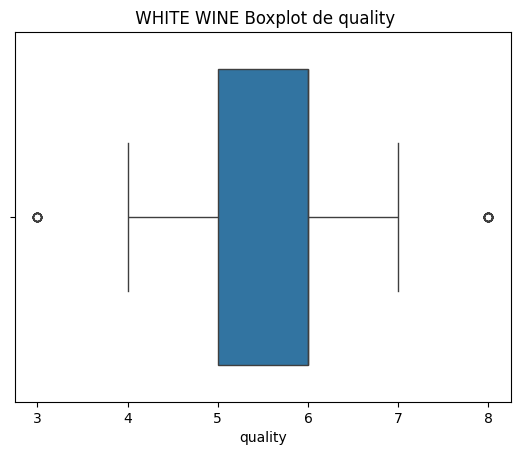

In [373]:
#observar comportamiento de las variables
df_white.hist(bins=10, figsize=(15,10))
plt.show()

# Boxplots para ver outliers
plt.figure(figsize=(8, 4))
for col in df_white.columns: #recorro columnas del dataframe

    sns.boxplot(x=df_red[col])
    plt.title(f' WHITE WINE Boxplot de {col}')
    plt.show()

In [374]:
#se tratan los outliers total sulfur dioxide (>400)
df_white[df_white["total sulfur dioxide"]> 400] # 1 registro
df_white = df_white[df_white["total sulfur dioxide"] <= 400]

#citric acid (>1)
df_white[df_white["citric acid"]> 1] # 2 registros
df_white = df_white[df_white["citric acid"]<= 1]
df_white.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,3958.0,6.839199,0.866978,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3958.0,0.280571,0.103467,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3958.0,0.333792,0.119814,0.00000,0.27000,0.3200,0.39000,1.00000
residual sugar,3958.0,5.916877,4.862829,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3958.0,0.045914,0.023108,0.00900,0.03600,0.0420,0.05000,0.34600
free sulfur dioxide,3958.0,34.821122,16.733811,2.00000,23.00000,33.0000,45.00000,146.50000
total sulfur dioxide,3958.0,137.083502,42.801642,9.00000,106.00000,133.0000,166.00000,366.50000
density,3958.0,0.993791,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3958.0,3.195422,0.151527,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3958.0,0.490313,0.113533,0.22000,0.41000,0.4800,0.55000,1.08000


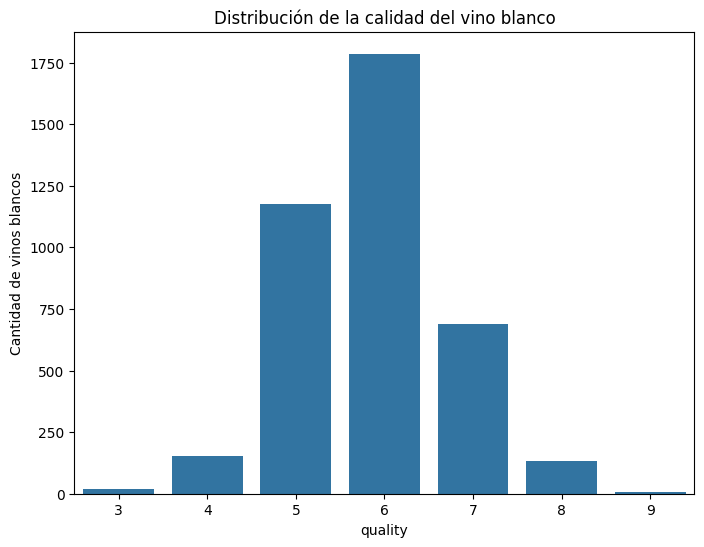

In [375]:
#explorar comportamiento de la variable objetivo o target: quality en la muestra
plt.figure(figsize=(8, 6))

sns.countplot(data=df_white,x='quality')
plt.title('Distribución de la calidad del vino blanco')
plt.xlabel('quality')
plt.ylabel('Cantidad de vinos blancos')
plt.show()

Se observa una concentración de los datos en calidad 6, seguido por la 5 y la 7. No se presentan vinos blancos con calidades 0,1,2 y 10.

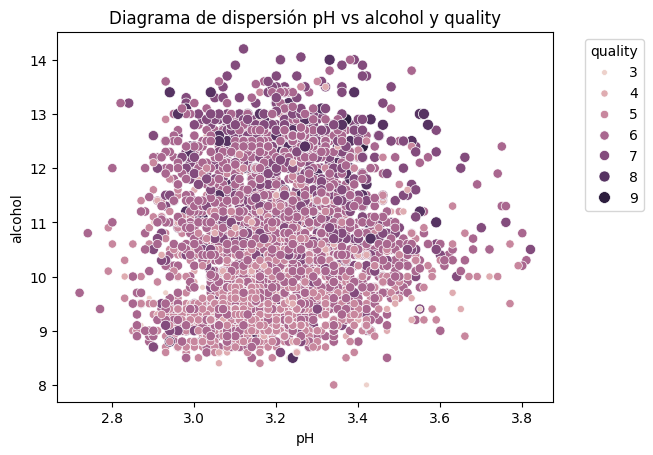

In [376]:
#exploración de los datos: visualización multivariada
sns.scatterplot(data=df_white, x='pH',y='alcohol',size='quality',hue='quality')

plt.title('Diagrama de dispersión pH vs alcohol y quality')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.legend(title='quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Esta vista refleja un comportamiento similar de la variable calidad con la presencia del alcohol en el vino. Pero al haber mayor cantidad de datos se observa una dispersión variada sin una tendencía clara sobre las otras variables.

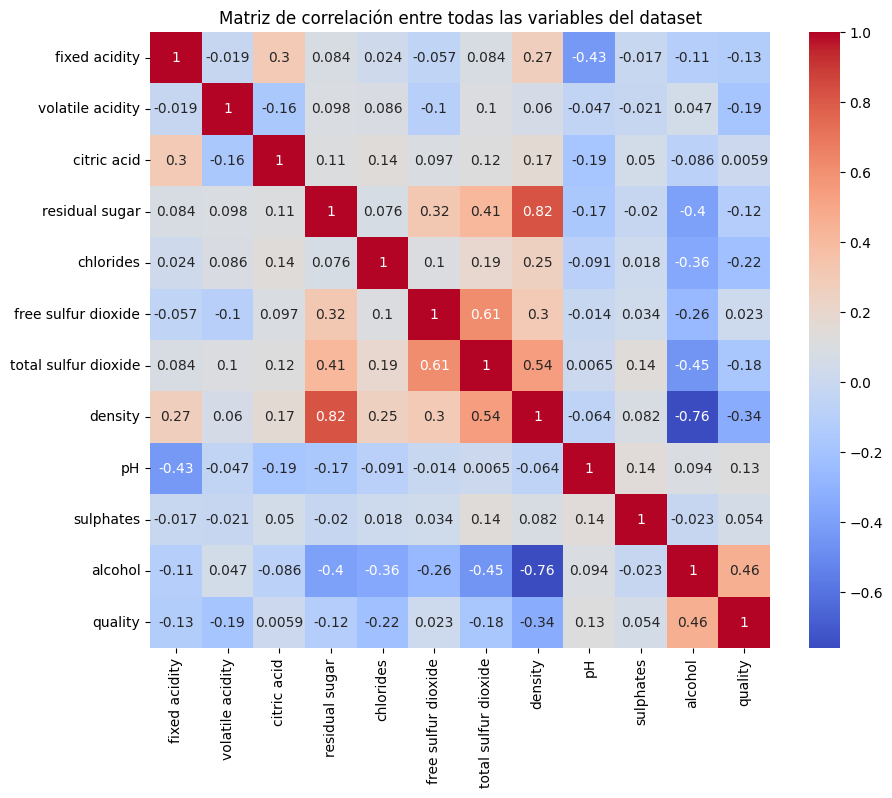

In [377]:
#Explorar relación entre las variables con mapas de calor
corr = df_white.corr() #matriz de correlacion

# Definir tamaño de la figura
plt.figure(figsize=(10, 8))

# Dibujar el heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset")
plt.show()

Se observa una corelación clara entre la densidad y los grados alcoholicos del vino. otra correlación que podemos extraer, aunque no muy significativa es entre la variable alcohol y  la variable residual sugar

In [378]:
#Luego de la limpiea, reviso nuevamente estadisticas descriptivas
df_white.describe().T
#calcular la moda de cada calumna
columnas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality']

for col in columnas:
    print(col ,":",df_white[col].mode().iloc[0])

#comparamos con vino tinto
print(".................................................................................")
for col in columnas:
    print(col ,":",df_white[col].mode().iloc[0], " | ", df_red[col].mode().iloc[0])


fixed acidity : 6.8
volatile acidity : 0.28
citric acid : 0.3
residual sugar : 1.2
chlorides : 0.036
free sulfur dioxide : 29.0
total sulfur dioxide : 111.0
density : 0.992
pH : 3.16
sulphates : 0.5
alcohol : 9.5
quality : 6
.................................................................................
fixed acidity : 6.8  |  7.2
volatile acidity : 0.28  |  0.5
citric acid : 0.3  |  0.0
residual sugar : 1.2  |  2.0
chlorides : 0.036  |  0.08
free sulfur dioxide : 29.0  |  6.0
total sulfur dioxide : 111.0  |  28.0
density : 0.992  |  0.9968
pH : 3.16  |  3.3
sulphates : 0.5  |  0.54
alcohol : 9.5  |  9.5
quality : 6  |  5


## Implementación de Modelos de Clasificación:

La variable quantity es numerica pero con valores numericos limitados, por lo que no es continua, además es de caracter ordinal.

Aplicaré el prepocesamiento, entrenamiento, y evaluación a los modelos Logistic Regression y K-Nearest Neighbors (KNN ) para ambos datasets.

In [379]:
!pip install lightgbm optuna

In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#optimizar parametros
import optuna
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [381]:
# Dividir data en features y target.
X_red = df_red.drop(columns="quality")
y_red = df_red["quality"]

X_white = df_white.drop(columns="quality")
y_white = df_white["quality"]

In [382]:
# Separar variables.
#la variable num_cols se utiliza para ambos datasets debido a que poseen las mismas columnas
num_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [383]:
# Split. Apartar data de entrenamiento y data de test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

In [384]:
#preprocesamiento es igual para data set de vino blanco como de vino tinto
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols)]) #escalar la data antes de entrenar el modelo

LogisticRegression

In [385]:
#creo un pipeline por cada dataset
pipeline_lr_red = Pipeline([
    ("preprocessing", preprocessor),
   ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_lr_white = Pipeline([
    ("preprocessing", preprocessor),
   ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [386]:
#Entrenar
pipeline_lr_red.fit(X_train_red, y_train_red)
pipeline_lr_white.fit(X_train_white, y_train_white)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [387]:
# Prediccion.
y_pred_red = pipeline_lr_red.predict(X_test_red)
y_pred_white = pipeline_lr_white.predict(X_test_white)

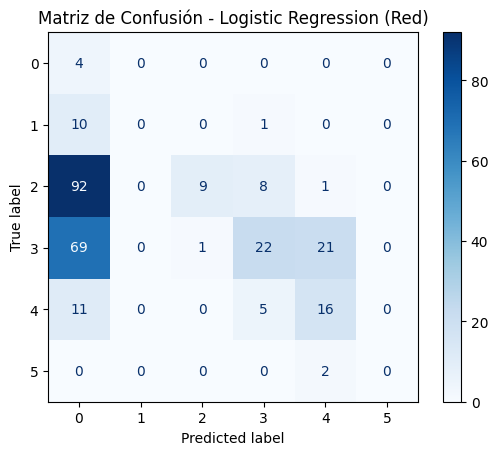

Accuracy del modelo para vino tinto: 0.1875


In [388]:
# Matriz de confusión vino tinto
cm = confusion_matrix(y_test_red, y_pred_red)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Logistic Regression (Red)")
plt.show()
accuracy_red = accuracy_score(y_test_red, y_pred_red)
print(f"Accuracy del modelo para vino tinto:", accuracy_red)

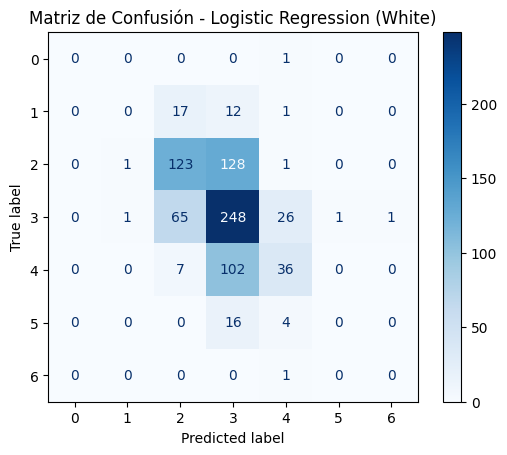

Accuracy del modelo para vino blanco: 0.5138888888888888


In [389]:
# Matriz de confusión vino blanco
cm = confusion_matrix(y_test_white, y_pred_white)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Logistic Regression (White)")
plt.show()
accuracy_white = accuracy_score(y_test_white, y_pred_white)
print(f"Accuracy del modelo para vino blanco:", accuracy_white)

Podemos observar un accuracy bastante bajo en ambos modelos. Probablemente un poco más alto para el modelo que fue entrenado con la data de vino blanco debido a la mayor cantidad de datos disponibles.   
La calidad con más asertividad para el vino blanco fue la 3.

KNeighborsClassifier

Para este modelo optimizaremos con optuna

In [390]:
def objective_knn_red(trial):

    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 50),
        "n_jobs": -1 #usar todos los nucleos
    }


    model = Pipeline([
        ("pre", preprocessor),
        ("knn", KNeighborsClassifier(**params))
    ])


    score_knn_red = cross_val_score(model, X_train_red, y_train_red, cv=5, scoring="r2", n_jobs=-1)
    return score_knn_red.mean()


In [391]:
def objective_knn_white(trial):

    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 50),
        "n_jobs": -1
    }


    model = Pipeline([
        ("pre", preprocessor),
        ("knn", KNeighborsClassifier(**params))
    ])


    score_knn_white= cross_val_score(model, X_train_white, y_train_white, cv=5, scoring="r2", n_jobs=-1)
    return score_knn_white.mean()


In [392]:
study_red = optuna.create_study(direction="maximize")
study_white = optuna.create_study(direction="maximize")

study_red.optimize(objective_knn_red, n_trials=10)
study_white.optimize(objective_knn_white, n_trials=10)

optuna_bparams_red = study_red.best_params
optuna_bparams_white = study_white.best_params

print("Mejores hiperparámetros (red):", optuna_bparams_red)
print("Mejores hiperparámetros (white):", optuna_bparams_white)

[I 2025-07-12 01:45:21,245] A new study created in memory with name: no-name-e9c4b63f-588b-440a-9458-8359780c87ed
[I 2025-07-12 01:45:21,248] A new study created in memory with name: no-name-ca5d8744-2046-4a6b-9a88-fcac8c5ab944
[I 2025-07-12 01:45:24,966] Trial 0 finished with value: 0.11063405111259103 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.11063405111259103.
[I 2025-07-12 01:45:25,265] Trial 1 finished with value: 0.13982620220466674 and parameters: {'n_neighbors': 39}. Best is trial 1 with value: 0.13982620220466674.
[I 2025-07-12 01:45:25,475] Trial 2 finished with value: 0.14946545448850324 and parameters: {'n_neighbors': 40}. Best is trial 2 with value: 0.14946545448850324.
[I 2025-07-12 01:45:25,761] Trial 3 finished with value: 0.13982620220466674 and parameters: {'n_neighbors': 39}. Best is trial 2 with value: 0.14946545448850324.
[I 2025-07-12 01:45:26,024] Trial 4 finished with value: 0.14946545448850324 and parameters: {'n_neighbors': 40}. Best is

Mejores hiperparámetros (red): {'n_neighbors': 49}
Mejores hiperparámetros (white): {'n_neighbors': 35}


In [393]:
 # Pipeline.
pipeline_knn_red = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(**optuna_bparams_red))
])

# Pipeline.
pipeline_knn_white = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(**optuna_bparams_white))
])

In [394]:
# Entrenar.
pipeline_knn_red.fit(X_train_red, y_train_red)
pipeline_knn_white.fit(X_train_white, y_train_white)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [395]:
# Predecir.
y_pred_knn_red = pipeline_knn_red.predict(X_test_red)
y_pred_knn_white = pipeline_knn_white.predict(X_test_white)

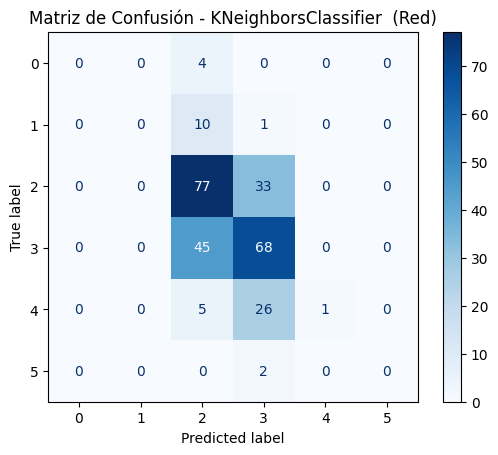

Accuracy del modelo para vino tinto: 0.5367647058823529


In [418]:
#Evaluar
# Matriz de confusión vino tinto
cm_knn_red = confusion_matrix(y_test_red, y_pred_knn_red)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_red)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - KNeighborsClassifier  (Red)")
plt.show()
accuracy_knn_red = accuracy_score(y_test_red, y_pred_knn_red)
print(f"Accuracy del modelo para vino tinto:", accuracy_knn_red)

Los resultados mejoran en terminos de accuracy con respecto al primer modelo evaluado par vino tinto. Pero aún así existe confusión importante entre las clases (calidad)

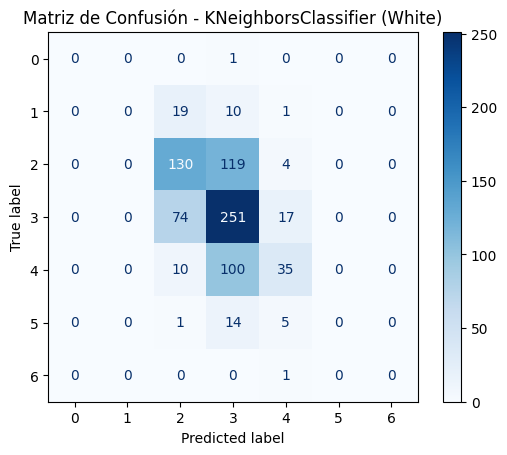

Accuracy del modelo para vino blanco: 0.5252525252525253


In [420]:
#Evaluar
# Matriz de confusión vino blanco
cm_knn_white = confusion_matrix(y_test_white, y_pred_knn_white)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_white)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - KNeighborsClassifier (White)")
plt.show()
accuracy_knn_white = accuracy_score(y_test_white, y_pred_knn_white)
print(f"Accuracy del modelo para vino blanco:", accuracy_knn_white)

resultados siilares al primer modelo evaluado para esta clase de vino

LGBMClassifier

In [398]:
from lightgbm import LGBMClassifier

In [ ]:
# Optuna
def objective_clf_red(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 30)
    }

    model = Pipeline([
        ("pre", preprocessor),
        ("lgbm", LGBMClassifier(random_state=42, **params)) #modelo de clasificación
    ])

    score_red = cross_val_score(model, X_train_red, y_train_red, cv=3, scoring="accuracy", n_jobs=-1)
    return score_red.mean()



In [402]:
# Optuna
def objective_clf_white(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 30)
    }

    model = Pipeline([
        ("pre", preprocessor),
        ("lgbm", LGBMClassifier(random_state=42, **params)) #modelo de clasificación
    ])

    score_white = cross_val_score(model, X_train_white, y_train_white, cv=3, scoring="accuracy", n_jobs=-1)
    return score_white.mean()



In [403]:
study_clf_red = optuna.create_study(direction="maximize")
study_clf_red.optimize(objective_clf_red, n_trials=20)
optuna_bparams_red = study_clf_red.best_params

print("Mejores hiperparámetros (clasificación) red wine:", optuna_bparams_red)

study_clf_white = optuna.create_study(direction="maximize")
study_clf_white.optimize(objective_clf_white, n_trials=20)
optuna_bparams_white = study_clf_white.best_params

print("Mejores hiperparámetros (clasificación) white wine:", optuna_bparams_white)

[I 2025-07-12 01:55:53,244] A new study created in memory with name: no-name-81e6414e-d8ff-4185-b8e1-eef1c34abe61
[I 2025-07-12 01:55:55,544] Trial 0 finished with value: 0.5382429612851553 and parameters: {'n_estimators': 283, 'max_depth': 8}. Best is trial 0 with value: 0.5382429612851553.
[I 2025-07-12 01:55:57,690] Trial 1 finished with value: 0.5317896369303603 and parameters: {'n_estimators': 309, 'max_depth': 20}. Best is trial 0 with value: 0.5382429612851553.
[I 2025-07-12 01:55:59,318] Trial 2 finished with value: 0.5400794804691286 and parameters: {'n_estimators': 223, 'max_depth': 5}. Best is trial 2 with value: 0.5400794804691286.
[I 2025-07-12 01:55:59,876] Trial 3 finished with value: 0.5539196930972387 and parameters: {'n_estimators': 57, 'max_depth': 14}. Best is trial 3 with value: 0.5539196930972387.
[I 2025-07-12 01:56:01,331] Trial 4 finished with value: 0.5364166449855374 and parameters: {'n_estimators': 189, 'max_depth': 25}. Best is trial 3 with value: 0.5539196

Mejores hiperparámetros (clasificación) red wine: {'n_estimators': 57, 'max_depth': 14}


[I 2025-07-12 01:56:30,307] Trial 0 finished with value: 0.5363277322992963 and parameters: {'n_estimators': 253, 'max_depth': 3}. Best is trial 0 with value: 0.5363277322992963.
[I 2025-07-12 01:56:35,626] Trial 1 finished with value: 0.5338003853702906 and parameters: {'n_estimators': 388, 'max_depth': 8}. Best is trial 0 with value: 0.5363277322992963.
[I 2025-07-12 01:56:36,890] Trial 2 finished with value: 0.5347494494710134 and parameters: {'n_estimators': 83, 'max_depth': 30}. Best is trial 0 with value: 0.5363277322992963.
[I 2025-07-12 01:56:42,350] Trial 3 finished with value: 0.5363259370960792 and parameters: {'n_estimators': 454, 'max_depth': 17}. Best is trial 0 with value: 0.5363277322992963.
[I 2025-07-12 01:56:47,299] Trial 4 finished with value: 0.5407517114270669 and parameters: {'n_estimators': 319, 'max_depth': 11}. Best is trial 4 with value: 0.5407517114270669.
[I 2025-07-12 01:56:49,896] Trial 5 finished with value: 0.5277993202163819 and parameters: {'n_estimat

Mejores hiperparámetros (clasificación) white wine: {'n_estimators': 298, 'max_depth': 21}


In [405]:
 # Pipeline.
pipeline_lgbm_red = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LGBMClassifier(random_state=42, **optuna_bparams_red))
])

# Pipeline.
pipeline_lgbm_white = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LGBMClassifier(random_state=42, **optuna_bparams_white))
])

In [ ]:
# Entrenar.
pipeline_lgbm_red.fit(X_train_red, y_train_red)
pipeline_lgbm_white.fit(X_train_white, y_train_white)

In [407]:
y_pred_lgbm_red = pipeline_lgbm_red.predict(X_test_red)
y_pred_lgbm_white = pipeline_lgbm_white.predict(X_test_white)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


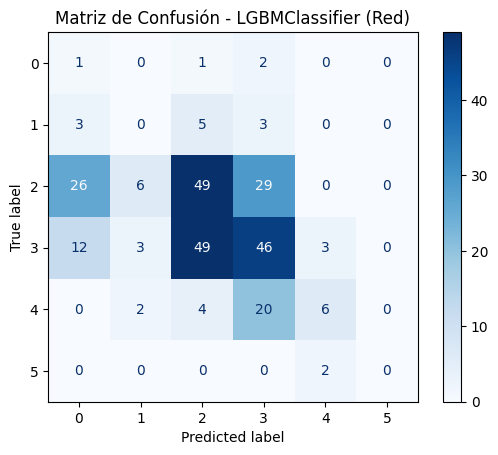

Accuracy del modelo para vino tinto: 0.375


In [416]:
#Evaluar
# Matriz de confusión vino tinto
cm_lgbm_red = confusion_matrix(y_test_red, y_pred_lgbm_red)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_red)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LGBMClassifier (Red)")
plt.show()
accuracy_lgbm_red = accuracy_score(y_test_red, y_pred_lgbm_red)
print(f"Accuracy del modelo para vino tinto:", accuracy_lgbm_red)

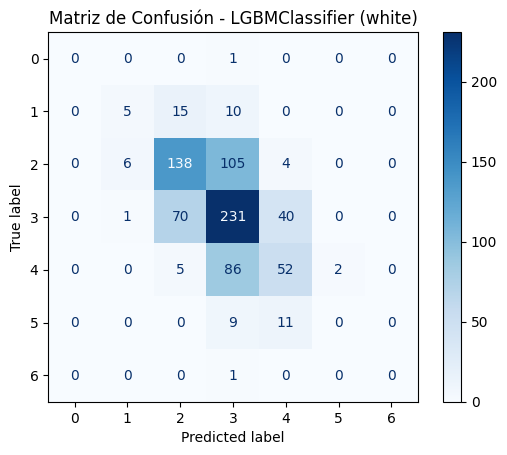

Accuracy del modelo para vino blanco: 0.5378787878787878


In [421]:
#Evaluar
# Matriz de confusión vino blanco
cm_lgbm_white = confusion_matrix(y_test_white, y_pred_lgbm_white)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_white)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LGBMClassifier (white)")
plt.show()
accuracy_lgbm_white = accuracy_score(y_test_white, y_pred_lgbm_white)
print(f"Accuracy del modelo para vino blanco:", accuracy_lgbm_white)

Accuracy

| Tipo de Vino | LogisticRegression | KNeighborsClassifier | LGBMClassifier |
|--------------|--------------------|----------------------|----------------|
| Red          | 0.1875             | 0.5367               | 0.357         |
| White        | 0.51388            | 0.5252              | 0.537878        |


De estos resultados podemos concluir que para ambos tipos de vino, el modelo Logistic Regression tiene el peor comportamientos en términos de accuracy. KNeighborsClassifier y LGBMClassifier tienen resultados similares para el vino blanco, pero para el vino tinto KNN es mejor que LGBM.

Logistic Regression al ser un modelo lineal y más simple en comparación a los otros dos puede no estar captando bien las relaciones complejas entre variables.

Para vino blanco el modelo LGBMClassifier parece ser la mejor opción.

Para vino tinto, KNN es el mejor modelo entre los evaluados, pero la precisión general baja que vemos en la matriz de confusión podría indicar que necesitamos más datos de entrenamiento. Se sugiere robustecer el dataset de vinos tintos.

In [ ]:
#exportamos los modelos seleccionados para cada tipo de vino (red & white)
import joblib

joblib.dump(pipeline_knn_red, "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen/models/modelo_knn_red_wine.pkl")
joblib.dump(pipeline_knn_white,  "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen/models/modelo_knn_white_wine.pkl")


['/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen/modelo_knn_white_wine.pkl']